# Context

The original dataset contains 1000 entries with 20 categorial/symbolic attributes prepared by Prof. Hofmann. In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes. The link to the original dataset can be found below.

# Content

* Age (numeric)
* Sex (text: male, female)
* Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
* Housing (text: own, rent, or free)
* Saving accounts (text - little, moderate, quite rich, rich)
* Checking account (numeric, in DM - Deutsch Mark)
* Credit amount (numeric, in DM)
* Duration (numeric, in month)
* Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)

First of all, this work on Credit Risk is my first work I have tried so far.
Our data for our work is German_Credit data.
Firstly, I will start by loading our libraries and data, and then I will make some analysis.
Let's start!!

1. Data & Data overview
2. Exploratory Data Analysis
3. Data Preprocessing & WoE
4. Variable Selection
5. Final Model
6. Evaluating

**Library**

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,mean_squared_error


In [2]:
dataset = pd.read_csv("german_credit_data_3.csv")

In [3]:
#We take an overview of the first 5 lines of our data.

In [4]:
dataset.head()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad

In [5]:
#we look at the structure of the data.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Unnamed: 0          1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
#we look at the missing data.

In [8]:
dataset.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [9]:
dataset.Risk.value_counts()

good    700
bad     300
Name: Risk, dtype: int64

<Figure size 432x288 with 0 Axes>

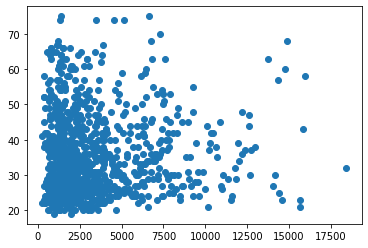

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(dataset['Credit amount'],dataset["Age"])
plt.figure()

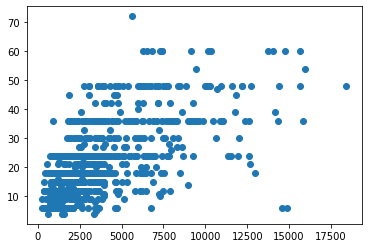

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(dataset['Credit amount'],dataset["Duration"])
plt.figure();

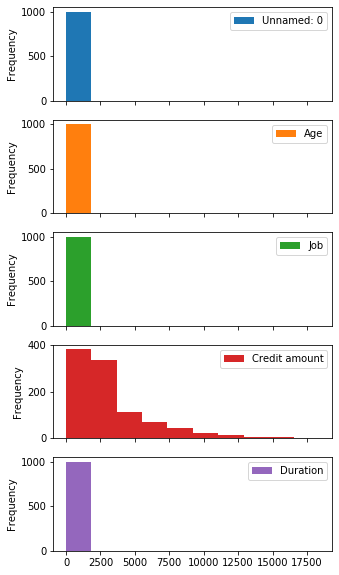

In [12]:
dataset.plot.hist(figsize = (5,10),subplots = True);

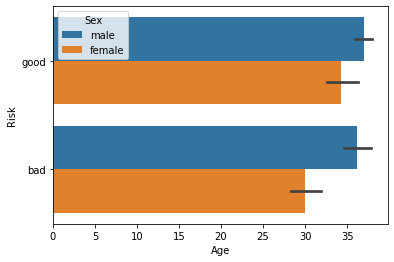

In [13]:
sns.barplot(x = "Age",y = "Risk",hue = "Sex",data = dataset);

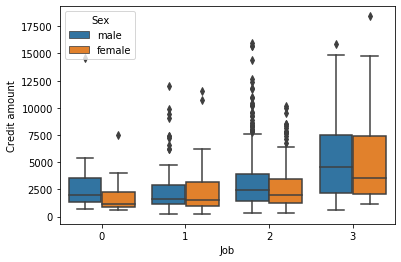

In [14]:
sns.boxplot(x = "Job",y = "Credit amount", hue = "Sex",data = dataset);

In [15]:
dataset.Duration.describe()

count    1000.000000
mean       20.903000
std        12.058814
min         4.000000
25%        12.000000
50%        18.000000
75%        24.000000
max        72.000000
Name: Duration, dtype: float64

In [16]:
dataset.Age.describe()

count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [17]:
df = dataset.copy()

In [18]:
df = df.iloc[:,1:11]

In [19]:
df.head()

Age     Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    male    2     own             NaN           little           1169   
1   22  female    2     own          little         moderate           5951   
2   49    male    1     own          little              NaN           2096   
3   45    male    2    free          little           little           7882   
4   53    male    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV  good  
1        48             radio/TV   bad  
2        12            education  good  
3        42  furniture/equipment  good  
4        24                  car   bad

In [20]:
#Since our variables have some missing values, I assigned them as "no_inf".

In [21]:
df["Saving accounts"].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [22]:
df["Saving accounts"].fillna("no_inf",inplace = True)

In [23]:
df["Checking account"].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [24]:
df["Checking account"].fillna("no_inf",inplace = True)

In [25]:
#Since the "Risk" variable is our target, we give "0" value to default customers and "1" to non-default customers.

In [26]:
df["Risk"] = np.where((df["Risk"] == "good"),1,0)

In [27]:
df["Job"].value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

In [28]:
#I preferred the "Label Encoder" method to numerate the gender variable

In [29]:
lab = LabelEncoder()
df["Sex"] = lab.fit_transform(df["Sex"])

In [30]:
df.head()

Age  Sex  Job Housing Saving accounts Checking account  Credit amount  \
0   67    1    2     own          no_inf           little           1169   
1   22    0    2     own          little         moderate           5951   
2   49    1    1     own          little           no_inf           2096   
3   45    1    2    free          little           little           7882   
4   53    1    2    free          little           little           4870   

   Duration              Purpose  Risk  
0         6             radio/TV     1  
1        48             radio/TV     0  
2        12            education     1  
3        42  furniture/equipment     1  
4        24                  car     0

In [31]:
categories_features = ["Job","Housing","Saving accounts","Checking account","Purpose"]
dummies = []
def dummynew(feat_nam):
    dummies.append(pd.get_dummies(df[feat_nam],prefix = feat_nam,prefix_sep = ":"))
    
for feat_nam in categories_features:
    dummynew(feat_nam)

In [32]:
dummies_collected = pd.concat(dummies,axis = 1)   
df = pd.concat([df,dummies_collected],axis = 1)
df.shape

(1000, 34)

In [33]:
#To avoid "overfitting", we divide the data into two labels which are train and test.

In [34]:
y = df["Risk"]
X = df.drop("Risk",axis = 1)

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

In [36]:
input_data = X_train
target_data = y_train

# **WoE (Weight of Evidence)**

Since we will use WoE after separating our data as train and test, we write a function to run WoE.
It is used as a criterion for scanning variables in credit risk modeling projects, such as the probability of WoE Default.
The weight of evidence tells the predictive power of an independent variable in relation to the
dependent variable. Since it evolved from credit scoring world, it is generally described as a
measure for the separation of good and bad customers. "Bad Customers" refers to the customers
who defaulted on a loan. and "Good Customers" refers to the customers who paid the loan.

In [37]:
def woe_cat(df, discrete_variabe_name, good_bad_variable_df):
    df = pd.concat([df[discrete_variabe_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df

In [38]:
#I make the following settings to see the complete data 

In [39]:
pd.options.display.max_columns = None

In [40]:
def plot_by_woe(df_woe,rotation_of_x_axis_labels = 0):
    x = np.array(df_woe.iloc[:,0].apply(str))
    Y = df_woe["WoE"]
    plt.figure(figsize = (18,6))
    plt.plot(x,Y,marker = "o",linestyle = "--",color = "k")
    plt.xlabel(df_woe.columns[0])
    plt.ylabel("Weight of Evidence")
    plt.title(str("Weight of Evidence by" + df_woe.columns[0]))
    plt.xticks(rotation = rotation_of_x_axis_labels)

In [41]:
df_temp = woe_cat(input_data,"Job",target_data)
df_temp

Job  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  prop_n_bad  \
0    3    117   0.632479     0.14625    74.0   43.0     0.132616    0.177686   
1    0     19   0.684211     0.02375    13.0    6.0     0.023297    0.024793   
2    1    159   0.698113     0.19875   111.0   48.0     0.198925    0.198347   
3    2    505   0.712871     0.63125   360.0  145.0     0.645161    0.599174   

        WoE  diff_prop_good  diff_WoE        IV  
0 -0.292556             NaN       NaN  0.016681  
1 -0.062231        0.051732  0.230325  0.016681  
2  0.002908        0.013903  0.065139  0.016681  
3  0.073949        0.014758  0.071041  0.016681

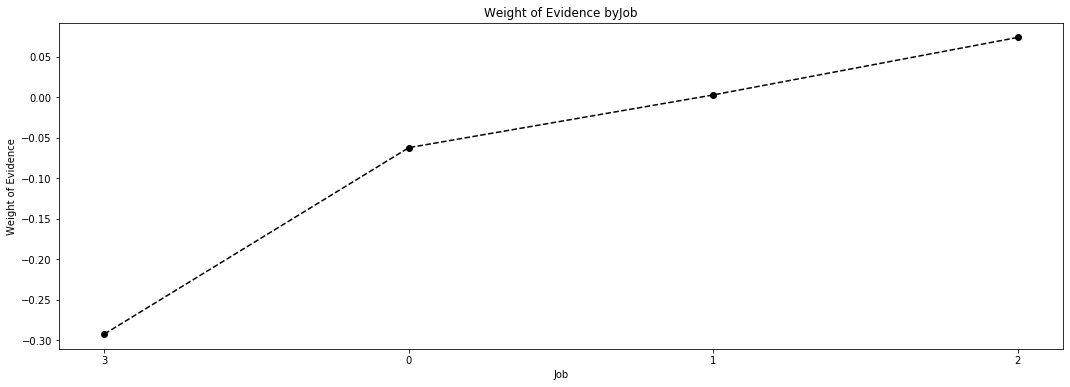

In [42]:
plot_by_woe(df_temp)

In [43]:
df_temp = woe_cat(input_data,"Housing",target_data)
df_temp

Housing  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0    rent    143   0.587413     0.17875    84.0   59.0     0.150538   
1    free     85   0.611765     0.10625    52.0   33.0     0.093190   
2     own    572   0.737762     0.71500   422.0  150.0     0.756272   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.243802 -0.482142             NaN       NaN  0.088546  
1    0.136364 -0.380685        0.024352  0.101457  0.088546  
2    0.619835  0.198949        0.125998  0.579634  0.088546

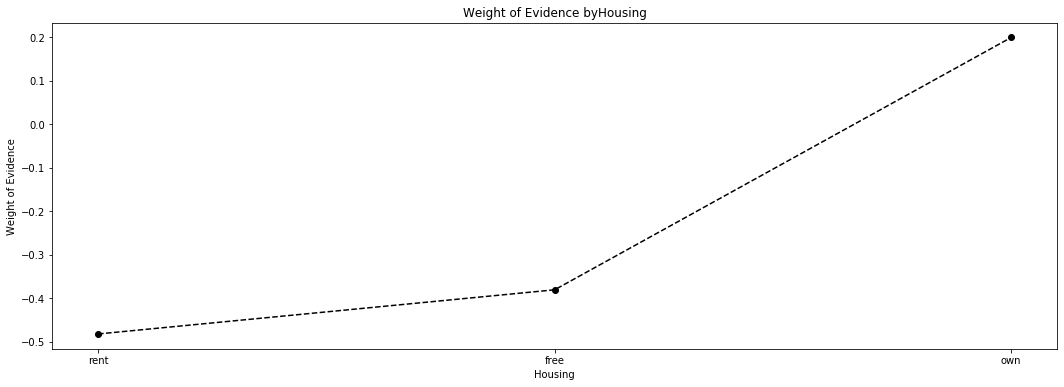

In [44]:
plot_by_woe(df_temp)

In [45]:
def input_data_dropper(input_data,key_list,axis = 1):
    for key in key_list:
        input_data = input_data.drop(key, axis = axis)
    return input_data


In [46]:
key_list = ["Housing:free","Housing:rent"]
input_data["Housing:free_rent"] = sum([input_data["Housing:free"],input_data["Housing:rent"]])
input_data = input_data_dropper(input_data,key_list)

In [47]:
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 687 to 684
Data columns (total 32 columns):
Age                            800 non-null int64
Sex                            800 non-null int32
Job                            800 non-null int64
Housing                        800 non-null object
Saving accounts                800 non-null object
Checking account               800 non-null object
Credit amount                  800 non-null int64
Duration                       800 non-null int64
Purpose                        800 non-null object
Job:0                          800 non-null uint8
Job:1                          800 non-null uint8
Job:2                          800 non-null uint8
Job:3                          800 non-null uint8
Housing:own                    800 non-null uint8
Saving accounts:little         800 non-null uint8
Saving accounts:moderate       800 non-null uint8
Saving accounts:no_inf         800 non-null uint8
Saving accounts:quite rich     800 non-

In [48]:
df_temp = woe_cat(input_data,"Saving accounts",target_data)

In [49]:
df_temp

Saving accounts  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0          little    485   0.639175     0.60625   310.0  175.0     0.555556   
1        moderate     77   0.649351     0.09625    50.0   27.0     0.089606   
2      quite rich     53   0.811321     0.06625    43.0   10.0     0.077061   
3          no_inf    145   0.834483     0.18125   121.0   24.0     0.216846   
4            rich     40   0.850000     0.05000    34.0    6.0     0.060932   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.723140 -0.263635             NaN       NaN  0.195821  
1    0.111570 -0.219235        0.010175  0.044400  0.195821  
2    0.041322  0.623194        0.161970  0.842429  0.195821  
3    0.099174  0.782315        0.023162  0.159122  0.195821  
4    0.024793  0.899180        0.015517  0.116864  0.195821

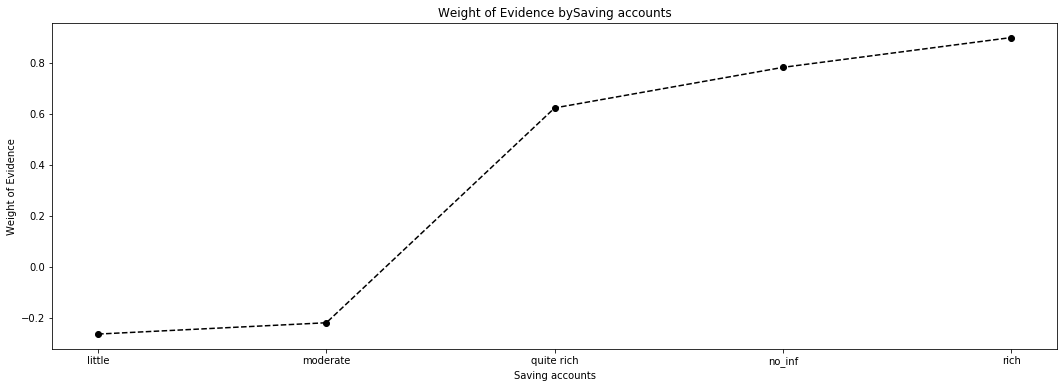

In [50]:
plot_by_woe(df_temp)

In [51]:
key_list = ["Saving accounts:little","Saving accounts:moderate"]
input_data["Saving accounts:little_moderate"] = sum([input_data["Saving accounts:little"],input_data["Saving accounts:moderate"]])
input_data = input_data_dropper(input_data,key_list)

In [52]:
df_temp = woe_cat(input_data,"Checking account",target_data)

In [53]:
df_temp

Checking account  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0           little    222   0.495495     0.27750   110.0  112.0     0.197133   
1         moderate    214   0.621495     0.26750   133.0   81.0     0.238351   
2             rich     51   0.803922     0.06375    41.0   10.0     0.073477   
3           no_inf    313   0.875399     0.39125   274.0   39.0     0.491039   

   prop_n_bad       WoE  diff_prop_good  diff_WoE      IV  
0    0.462810 -0.853440             NaN       NaN  0.6455  
1    0.334711 -0.339521        0.126000  0.513918  0.6455  
2    0.041322  0.575566        0.182426  0.915087  0.6455  
3    0.161157  1.114145        0.071478  0.538579  0.6455

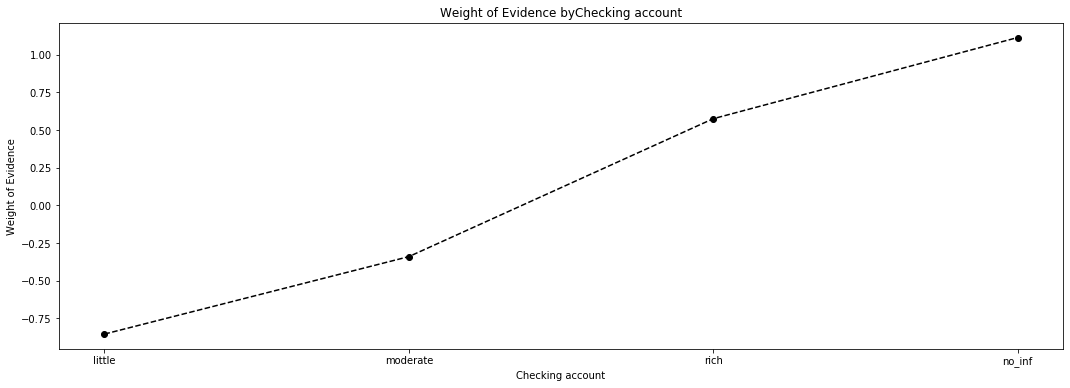

In [54]:
plot_by_woe(df_temp)

In [55]:
df_temp = woe_cat(input_data,"Purpose",target_data)

In [56]:
df_temp

Purpose  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0      vacation/others     11   0.545455     0.01375     6.0    5.0   
1  domestic appliances     10   0.600000     0.01250     6.0    4.0   
2            education     51   0.607843     0.06375    31.0   20.0   
3             business     83   0.626506     0.10375    52.0   31.0   
4              repairs     19   0.631579     0.02375    12.0    7.0   
5  furniture/equipment    137   0.671533     0.17125    92.0   45.0   
6                  car    266   0.695489     0.33250   185.0   81.0   
7             radio/TV    223   0.780269     0.27875   174.0   49.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0     0.010753    0.020661 -0.653100             NaN       NaN  0.082804  
1     0.010753    0.016529 -0.429956        0.054545  0.223144  0.082804  
2     0.055556    0.082645 -0.397166        0.007843  0.032790  0.082804  
3     0.093190    0.128099 -0.318165        0.018663  0.079002  0.082804  
4     0.021505    0.028926 -0.296425        0.005073  0.021740  0.082804  
5     0.164875    0.185950 -0.120295        0.039954  0.176130  0.082804  
6     0.331541    0.334711 -0.009515        0.023956  0.110781  0.082804  
7     0.311828    0.202479  0.431814        0.084780  0.441328  0.082804

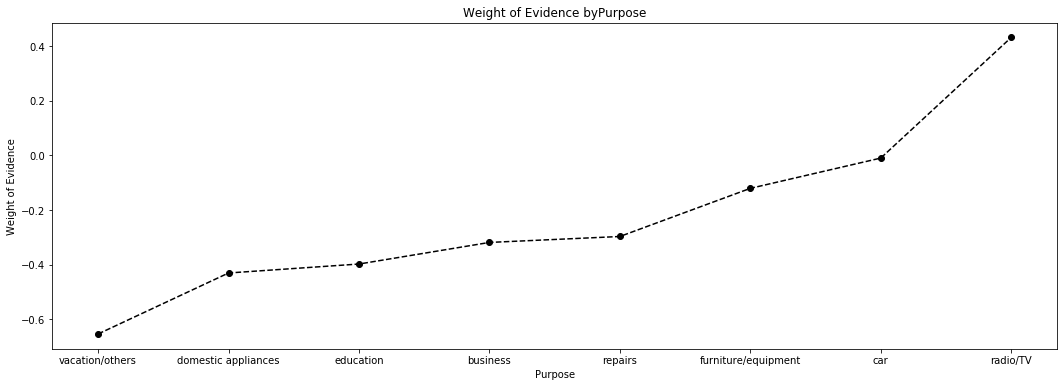

In [57]:
plot_by_woe(df_temp)

In [58]:
key_list = ["Purpose:domestic appliances","Purpose:education","Purpose:business","Purpose:repairs"]
input_data["Purpose:dom_edu"] = sum([input_data["Purpose:domestic appliances"],input_data["Purpose:education"]])
input_data["Purpose:bus_rep"] = sum([input_data["Purpose:business"],input_data["Purpose:repairs"]])                         
input_data = input_data_dropper(input_data,key_list)


In [59]:
def woe_continuous(df, discrete_var_name, good_bad_variable_df):
    df = pd.concat([df[discrete_var_name], good_bad_variable_df], axis = 1)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                    df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].mean()], axis = 1)
    df = df.iloc[:, [0, 1, 3]]
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    df['n_good'] = df['prop_good'] * df['n_obs']
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    #df = df.sort_values(['WoE'])
    #df = df.reset_index(drop = True)
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    df['diff_WoE'] = df['WoE'].diff().abs()
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    return df


In [60]:
input_data["Age_2"] = pd.cut(input_data["Age"],5)
df_temp = woe_continuous(input_data,"Age_2",target_data)

In [61]:
df_temp

Age_2  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0  (18.944, 30.2]    318   0.644654     0.39750   205.0  113.0     0.367384   
1    (30.2, 41.4]    268   0.731343     0.33500   196.0   72.0     0.351254   
2    (41.4, 52.6]    131   0.755725     0.16375    99.0   32.0     0.177419   
3    (52.6, 63.8]     58   0.655172     0.07250    38.0   20.0     0.068100   
4    (63.8, 75.0]     25   0.800000     0.03125    20.0    5.0     0.035842   

   prop_n_bad       WoE  diff_prop_good  diff_WoE        IV  
0    0.466942 -0.239799             NaN       NaN  0.057257  
1    0.297521  0.166027        0.086689  0.405826  0.057257  
2    0.132231  0.293963        0.024382  0.127935  0.057257  
3    0.082645 -0.193567        0.100553  0.487530  0.057257  
4    0.020661  0.550873        0.144828  0.744440  0.057257

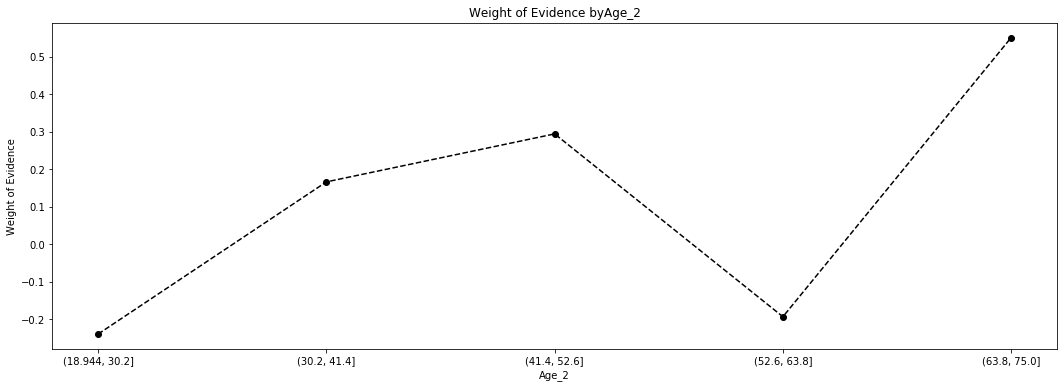

In [62]:
plot_by_woe(df_temp)

In [63]:
input_data["Age:30"] = np.where((input_data["Age"] <= 30),1,0)
input_data["Age:30-42"] = np.where((input_data["Age"]>30) & (input_data["Age"] <= 42),1,0)
input_data["Age:42-52"] = np.where((input_data["Age"]>42) & (input_data["Age"] <=52),1,0)
input_data["Age:52-64"] = np.where((input_data["Age"]>52) & (input_data["Age"] <= 64),1,0)
input_data["Age:64"] = np.where((input_data["Age"] > 64),1,0)

In [64]:
input_data["cr_amount"] = pd.cut(input_data["Credit amount"],10)
df_temp = woe_continuous(input_data,"cr_amount",target_data)

In [65]:
df_temp

cr_amount  n_obs  prop_good  prop_n_obs  n_good  n_bad  \
0   (231.826, 2067.4]    363   0.713499     0.45375   259.0  104.0   
1    (2067.4, 3884.8]    232   0.793103     0.29000   184.0   48.0   
2    (3884.8, 5702.2]     72   0.527778     0.09000    38.0   34.0   
3    (5702.2, 7519.6]     64   0.671875     0.08000    43.0   21.0   
4    (7519.6, 9337.0]     33   0.606061     0.04125    20.0   13.0   
5   (9337.0, 11154.4]     15   0.600000     0.01875     9.0    6.0   
6  (11154.4, 12971.8]      9   0.111111     0.01125     1.0    8.0   
7  (12971.8, 14789.2]      6   0.333333     0.00750     2.0    4.0   
8  (14789.2, 16606.6]      5   0.400000     0.00625     2.0    3.0   
9  (16606.6, 18424.0]      1   0.000000     0.00125     0.0    1.0   

   prop_n_good  prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0     0.464158    0.429752  0.077016             NaN       NaN  inf  
1     0.329749    0.198347  0.508314        0.079605  0.431298  inf  
2     0.068100    0.140496 -0.724196        0.265326  1.232509  inf  
3     0.077061    0.086777 -0.118744        0.144097  0.605452  inf  
4     0.035842    0.053719 -0.404638        0.065814  0.285895  inf  
5     0.016129    0.024793 -0.429956        0.006061  0.025318  inf  
6     0.001792    0.033058 -2.914863        0.488889  2.484907  inf  
7     0.003584    0.016529 -1.528568        0.222222  1.386294  inf  
8     0.003584    0.012397 -1.240886        0.066667  0.287682  inf  
9     0.000000    0.004132      -inf        0.400000       inf  inf

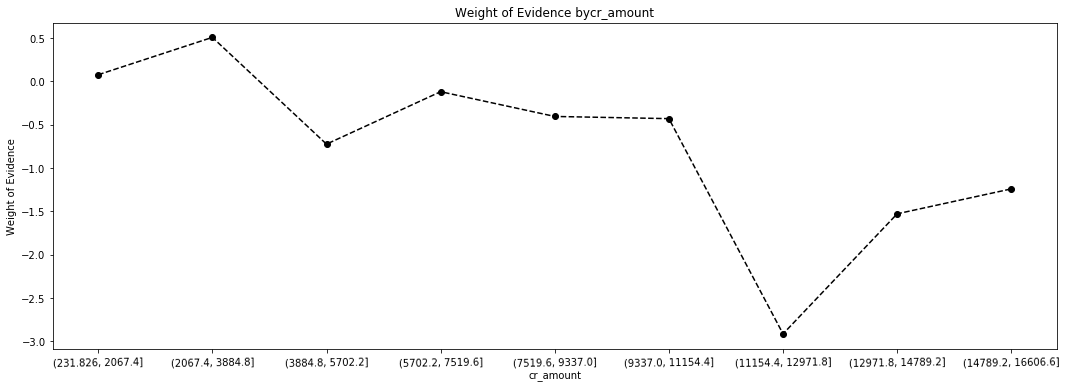

In [66]:
plot_by_woe(df_temp,rotation_of_x_axis_labels = 1)

In [67]:
input_data["cr_amount:2068"] = np.where((input_data["Credit amount"] <= 2068),1,0)
input_data["cr_amount:2068-3885"] = np.where((input_data["Credit amount"] > 2068) & (input_data["Credit amount"] <= 3885),1,0)
input_data["cr_amount:3885-5703"] = np.where((input_data["Credit amount"] > 3885) & (input_data["Credit amount"] <= 5703),1,0)
input_data["cr_amount:5703-11155"] = np.where((input_data["Credit amount"] > 5703) & (input_data["Credit amount"] <= 11155),1,0)
input_data["cr_amount:11155"] = np.where((input_data["Credit amount"] > 11155),1,0)


In [68]:
input_data["Duration"].unique()

array([36, 24, 60, 15,  6, 21, 48, 12, 18, 30, 10,  4,  8,  9, 11, 22, 13,
       45, 27, 20, 47,  7, 42, 33, 16, 54, 14, 39, 28, 26,  5, 72],
      dtype=int64)

In [69]:
input_data["Duration_2"] = pd.cut(input_data["Duration"],10)
df_temp = woe_continuous(input_data,"Duration_2",target_data)

In [70]:
df_temp

Duration_2  n_obs  prop_good  prop_n_obs  n_good  n_bad  prop_n_good  \
0  (3.932, 10.8]    136   0.852941     0.17000   116.0   20.0     0.207885   
1   (10.8, 17.6]    221   0.755656     0.27625   167.0   54.0     0.299283   
2   (17.6, 24.4]    262   0.667939     0.32750   175.0   87.0     0.313620   
3   (24.4, 31.2]     44   0.659091     0.05500    29.0   15.0     0.051971   
4   (31.2, 38.0]     71   0.577465     0.08875    41.0   30.0     0.073477   
5   (38.0, 44.8]     13   0.769231     0.01625    10.0    3.0     0.017921   
6   (44.8, 51.6]     39   0.358974     0.04875    14.0   25.0     0.025090   
7   (51.6, 58.4]      2   0.500000     0.00250     1.0    1.0     0.001792   
8   (58.4, 65.2]     11   0.454545     0.01375     5.0    6.0     0.008961   
9   (65.2, 72.0]      1   0.000000     0.00125     0.0    1.0     0.000000   

   prop_n_bad       WoE  diff_prop_good  diff_WoE   IV  
0    0.082645  0.922437             NaN       NaN  inf  
1    0.223140  0.293589        0.097285  0.628848  inf  
2    0.359504 -0.136543        0.087717  0.430132  inf  
3    0.061983 -0.176176        0.008848  0.039632  inf  
4    0.123967 -0.523047        0.081626  0.346871  inf  
5    0.012397  0.368552        0.191766  0.891598  inf  
6    0.103306 -1.415240        0.410256  1.783791  inf  
7    0.004132 -0.835421        0.141026  0.579818  inf  
8    0.024793 -1.017743        0.045455  0.182322  inf  
9    0.004132      -inf        0.454545       inf  inf

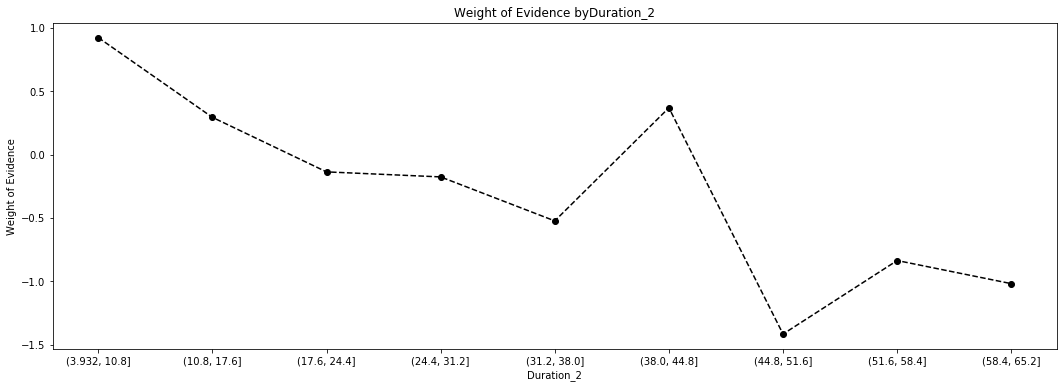

In [71]:
plot_by_woe(df_temp)

In [72]:
input_data["Duration:11"] = np.where((input_data["Duration"] <= 11),1,0)
input_data["Duration:11-18"] = np.where((input_data["Duration"] >11) & (input_data["Duration"] <= 18),1,0)
input_data["Duration:18-31"] = np.where((input_data["Duration"] >18) & (input_data["Duration"] <= 31),1,0)
input_data["Duration:31-38"] = np.where((input_data["Duration"] >31) & (input_data["Duration"] <= 38),1,0)
input_data["Duration:38-45"] = np.where((input_data["Duration"] >38) & (input_data["Duration"] <= 45),1,0)
input_data["Duration:45-52"] = np.where((input_data["Duration"] >45) & (input_data["Duration"] <= 52),1,0)
input_data["Duration:52"] = np.where((input_data["Duration"] > 52),1,0)

In [73]:
key_list = ["cr_amount","Age_2","Duration_2","Purpose","Checking account","Saving accounts","Housing","Job","Age",
            "Credit amount","Duration"]
input_data = input_data_dropper(input_data,key_list)

In [74]:
key_list = ["Job:0","Housing:own","Saving accounts:no_inf","Checking account:rich","Purpose:car","Age:64",
            "Duration:11","cr_amount:2068"]
input_data = input_data_dropper(input_data,key_list)

In [75]:
#After numerating the X_train data, we will follow the same steps for X_test. I share this part below.

In [76]:
X_train = input_data

In [77]:
X_train.shape

(800, 30)

In [78]:
input_data = X_test

In [79]:
input_data.shape

(200, 33)

In [80]:
input_data.head()

Age  Sex  Job Housing Saving accounts Checking account  Credit amount  \
993   30    1    3     own          little           little           3959   
859   26    1    2    rent        moderate           no_inf           3577   
298   43    1    2     own          little           no_inf           2515   
553   27    1    2     own        moderate         moderate           1995   
672   42    1    3     own          little           no_inf          10366   

     Duration              Purpose  Job:0  Job:1  Job:2  Job:3  Housing:free  \
993        36  furniture/equipment      0      0      0      1             0   
859         9                  car      0      0      1      0             0   
298        18  furniture/equipment      0      0      1      0             0   
553        12                  car      0      0      1      0             0   
672        60                  car      0      0      0      1             0   

     Housing:own  Housing:rent  Saving accounts:little  \
993            1             0                       1   
859            0             1                       0   
298            1             0                       1   
553            1             0                       0   
672            1             0                       1   

     Saving accounts:moderate  Saving accounts:no_inf  \
993                         0                       0   
859                         1                       0   
298                         0                       0   
553                         1                       0   
672                         0                       0   

     Saving accounts:quite rich  Saving accounts:rich  \
993                           0                     0   
859                           0                     0   
298                           0                     0   
553                           0                     0   
672                           0                     0   

     Checking account:little  Checking account:moderate  \
993                        1                          0   
859                        0                          0   
298                        0                          0   
553                        0                          1   
672                        0                          0   

     Checking account:no_inf  Checking account:rich  Purpose:business  \
993                        0                      0                 0   
859                        1                      0                 0   
298                        1                      0                 0   
553                        0                      0                 0   
672                        1                      0                 0   

     Purpose:car  Purpose:domestic appliances  Purpose:education  \
993            0                            0                  0   
859            1                            0                  0   
298            0                            0                  0   
553            1                            0                  0   
672            1                            0                  0   

     Purpose:furniture/equipment  Purpose:radio/TV  Purpose:repairs  \
993                            1                 0                0   
859                            0                 0                0   
298                            1                 0                0   
553                            0                 0                0   
672                            0                 0                0   

     Purpose:vacation/others  
993                        0  
859                        0  
298                        0  
553                        0  
672                        0

In [81]:
key_list = ["Housing:free","Housing:rent"]
input_data["Housing:free_rent"] = sum([input_data["Housing:free"],input_data["Housing:rent"]])
input_data = input_data_dropper(input_data,key_list)

In [82]:
key_list = ["Saving accounts:little","Saving accounts:moderate"]
input_data["Saving accounts:little_moderate"] = sum([input_data["Saving accounts:little"],input_data["Saving accounts:moderate"]])
input_data = input_data_dropper(input_data,key_list)

In [83]:
key_list = ["Purpose:domestic appliances","Purpose:education","Purpose:business","Purpose:repairs"]
input_data["Purpose:dom_edu"] = sum([input_data["Purpose:domestic appliances"],input_data["Purpose:education"]])
input_data["Purpose:bus_rep"] = sum([input_data["Purpose:business"],input_data["Purpose:repairs"]])                         
input_data = input_data_dropper(input_data,key_list)

In [84]:
input_data["Age_2"] = pd.cut(input_data["Age"],5)

In [85]:
input_data["Age:30"] = np.where((input_data["Age"] <= 30),1,0)
input_data["Age:30-42"] = np.where((input_data["Age"]>30) & (input_data["Age"] <= 42),1,0)
input_data["Age:42-52"] = np.where((input_data["Age"]>42) & (input_data["Age"] <=52),1,0)
input_data["Age:52-64"] = np.where((input_data["Age"]>52) & (input_data["Age"] <= 64),1,0)
input_data["Age:64"] = np.where((input_data["Age"] > 64),1,0)

In [86]:
input_data["cr_amount"] = pd.cut(input_data["Credit amount"],10)

In [87]:
input_data["cr_amount:2068"] = np.where((input_data["Credit amount"] <= 2068),1,0)
input_data["cr_amount:2068-3885"] = np.where((input_data["Credit amount"] > 2068) & (input_data["Credit amount"] <= 3885),1,0)
input_data["cr_amount:3885-5703"] = np.where((input_data["Credit amount"] > 3885) & (input_data["Credit amount"] <= 5703),1,0)
input_data["cr_amount:5703-11155"] = np.where((input_data["Credit amount"] > 5703) & (input_data["Credit amount"] <= 11155),1,0)
input_data["cr_amount:11155"] = np.where((input_data["Credit amount"] > 11155),1,0)

In [88]:
input_data["Duration:11"] = np.where((input_data["Duration"] <= 11),1,0)
input_data["Duration:11-18"] = np.where((input_data["Duration"] >11) & (input_data["Duration"] <= 18),1,0)
input_data["Duration:18-31"] = np.where((input_data["Duration"] >18) & (input_data["Duration"] <= 31),1,0)
input_data["Duration:31-38"] = np.where((input_data["Duration"] >31) & (input_data["Duration"] <= 38),1,0)
input_data["Duration:38-45"] = np.where((input_data["Duration"] >38) & (input_data["Duration"] <= 45),1,0)
input_data["Duration:45-52"] = np.where((input_data["Duration"] >45) & (input_data["Duration"] <= 52),1,0)
input_data["Duration:52"] = np.where((input_data["Duration"] > 52),1,0)

In [89]:
#We extract the extra columns from X_test data that we created for X_test.

In [90]:
key_list = ["cr_amount","Age_2","Purpose","Checking account","Saving accounts","Housing","Job","Age",
            "Credit amount","Duration"]
input_data = input_data_dropper(input_data,key_list)

In [91]:
input_data.shape

(200, 38)

In [92]:
#In order not to fall into the dummy trap, we extract our reference variables from the data.

In [93]:
key_list = ["Job:0","Housing:own","Saving accounts:no_inf","Checking account:rich","Purpose:car","Age:64",
            "Duration:11","cr_amount:2068"]
input_data = input_data_dropper(input_data,key_list)

In [94]:
X_test = input_data

In [95]:
X_test.shape

(200, 30)

In [96]:
X_train.shape

(800, 30)

# Variable Selection

Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.Irrelevant or partially relevant features can negatively impact model performance.

In [97]:
#First of all, I check whether it has constant feature.

In [98]:
constant_features = [
        feat for feat in X_train.columns if X_train[feat].std() == 0]
len(constant_features)

0

In [99]:
#I check for duplicate data.

In [100]:
data_t = X_train.T
data_t.head()
data_t.duplicated().sum()

0

In [101]:
#Before running the model, I will look at the correlation so that if there are variables in it, 
#I will extract them from the train and test data.

Correlation states how the features are related to each other or the target variable.Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

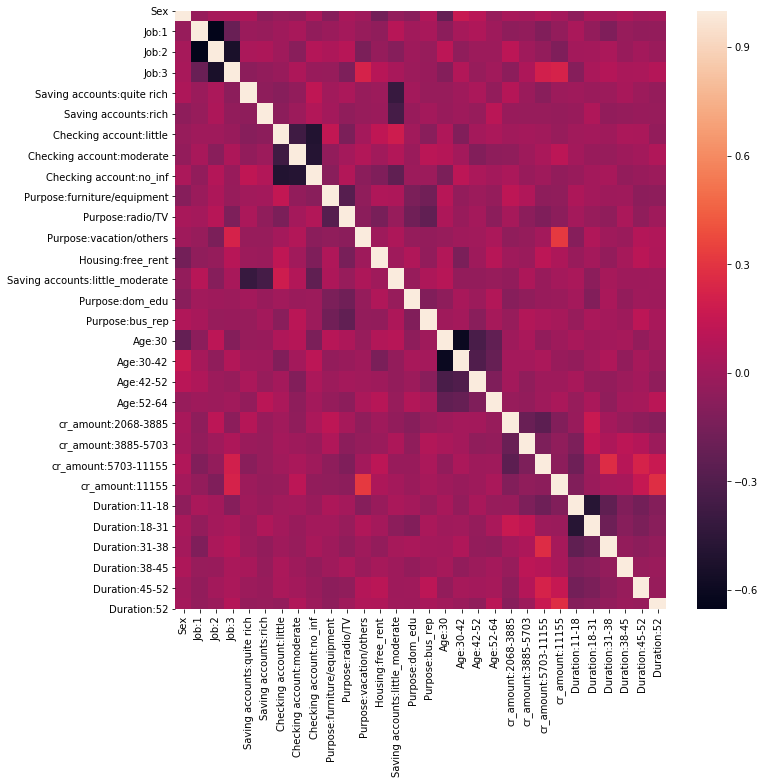

In [102]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(11,11)
sns.heatmap(corrmat)

In [103]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X_train,0.8)
len(set(corr_features))#In this way, we can reach variables that are correlated with each other.

0

Feature selection is an important pre-processing step for solving classification problems. A good feature selection method may not only improve the performance of the final classifier, but also reduce the computational complexity of it.

In [104]:
#We make variable elimination with the Roc-auc curve.

In [105]:
roc_values = []
for feature in X_train.columns:
    clf = LogisticRegression()
    clf.fit(X_train[feature].fillna(0).to_frame(),y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test,y_scored[:,1]))

roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending = False)



Checking account:no_inf            0.700219
Checking account:moderate          0.597742
Age:30                             0.597499
Checking account:little            0.596163
Saving accounts:little_moderate    0.587907
Age:30-42                          0.580015
Housing:free_rent                  0.559373
Sex                                0.550024
Job:1                              0.547232
cr_amount:5703-11155               0.545532
Duration:31-38                     0.544318
Purpose:radio/TV                   0.542861
Saving accounts:rich               0.528169
Duration:45-52                     0.527076
cr_amount:11155                    0.523919
Saving accounts:quite rich         0.523069
Age:42-52                          0.520277
Duration:11-18                     0.517363
Duration:38-45                     0.515299
cr_amount:2068-3885                0.508378
Purpose:furniture/equipment        0.502914
Purpose:dom_edu                    0.501214
Age:52-64                       

22

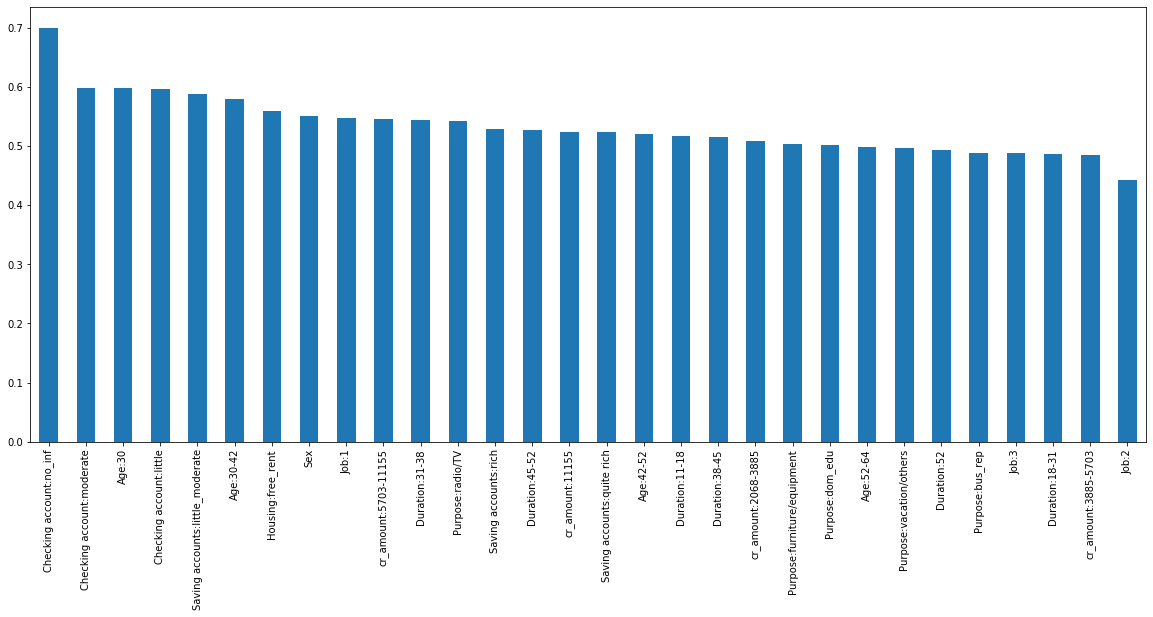

In [106]:
roc_values.sort_values(ascending = False).plot.bar(figsize = (20,8))
len(roc_values[roc_values > 0.5])


In [107]:
#We extract variables below 0.5 from our data.

In [108]:
key_list = ["Age:52-64","Purpose:vacation/others","Duration:52","Purpose:bus_rep","Job:3","Duration:18-31",
            "cr_amount:3885-5703","Job:2"]
X_train = input_data_dropper(X_train,key_list)
X_test = input_data_dropper(X_test,key_list)

In [109]:
#We extract our variables that are not significant comparing to p value, ie below 0.05. 
#However, if the part we need to pay attention is between 0.05 and all the dummies, we will eliminate variables.
#Since there is no package that we can see p-value ready for Logistic Regression, we will run it with the class method.

In [110]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values
        
reg = LogisticRegression_with_p_values()
reg.fit(X_train, y_train)

variable_names = X_train.columns.values
summary_table = pd.DataFrame(columns = ["variable_names"],data = variable_names)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = reg.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['p_values'] = p_values
summary_table


variable_names  Coefficients  p_values
0                         Intercept      1.498888       NaN
1                               Sex      0.218149  0.238345
2                             Job:1      0.027716  0.898928
3        Saving accounts:quite rich     -0.324240  0.461863
4              Saving accounts:rich      0.168936  0.736910
5           Checking account:little     -0.988523  0.001047
6         Checking account:moderate     -0.464298  0.132904
7           Checking account:no_inf      0.798930  0.011209
8       Purpose:furniture/equipment      0.085980  0.722179
9                  Purpose:radio/TV      0.341928  0.117062
10                Housing:free_rent     -0.387413  0.039862
11  Saving accounts:little_moderate     -0.659762  0.004819
12                  Purpose:dom_edu     -0.190425  0.549319
13                           Age:30     -0.229615  0.392280
14                        Age:30-42     -0.127818  0.652333
15                        Age:42-52      0.284614  0.408664
16              cr_amount:2068-3885      0.701437  0.001122
17             cr_amount:5703-11155      0.261563  0.355027
18                  cr_amount:11155     -1.233412  0.024879
19                   Duration:11-18     -0.049941  0.792816
20                   Duration:31-38     -0.802179  0.011888
21                   Duration:38-45     -0.210408  0.718862
22                   Duration:45-52     -1.161084  0.007559

In [111]:
#As a result of p_value; 
#Since it was observed that the variables, which are Sex, Age, Purpose and Job, are insignificant, we extract these values from the data.

In [112]:
key_list = ["Sex","Job:1","Age:30","Age:30-42","Age:42-52","Purpose:furniture/equipment","Purpose:dom_edu",
            "Purpose:radio/TV"]
X_train = input_data_dropper(X_train,key_list)

In [113]:
#Let's do it for X_test too.

In [114]:
X_test = input_data_dropper(X_test,key_list)

## Final Model

In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
reg = LogisticRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
cm = confusion_matrix(y_test,y_pred)

In [116]:
reg.score(X_test,y_test)

0.725

**KNN&Random Forest Results**

In [117]:
#I will run the KNN and Random Forest algorithms to select the right model and select the model 
#according to the result of between Logistic, KNN and Random Forest

In [118]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Random forests are one the most popular machine learning algorithms. They are so successful because they provide in general a good predictive performance, low overfitting and easy interpretability.

In [119]:
models = {"KNN" : KNeighborsClassifier(),
         "RandomForest" : RandomForestClassifier()}

In [120]:
def model_results(models,X_train,X_test,y_train,y_test):
    np.random.seed(42)
    for name,model in models.items():
        model.fit(X_train,y_train)
        model.predict(X_test)
        print(name)
        print("Acc_Score:" + str(accuracy_score(y_test,model.predict(X_test))))
        print(classification_report(y_test,model.predict(X_test)))

In [121]:
model_results(models,X_train,X_test,y_train,y_test)

KNN
Acc_Score:0.705
              precision    recall  f1-score   support

           0       0.49      0.47      0.48        58
           1       0.79      0.80      0.79       142

    accuracy                           0.70       200
   macro avg       0.64      0.63      0.64       200
weighted avg       0.70      0.70      0.70       200

RandomForest
Acc_Score:0.675
              precision    recall  f1-score   support

           0       0.45      0.52      0.48        58
           1       0.79      0.74      0.76       142

    accuracy                           0.68       200
   macro avg       0.62      0.63      0.62       200
weighted avg       0.69      0.68      0.68       200



**Confusion Matrix**

In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an error matrix. A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known. It allows the visualization of the performance of an algorithm.It allows easy identification of confusion between classes. 

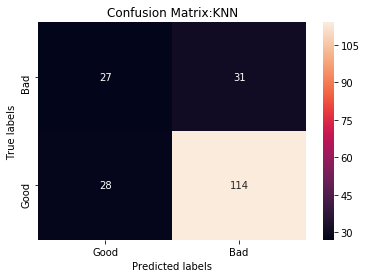

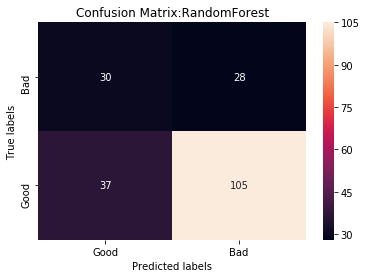

<Figure size 432x288 with 0 Axes>

In [122]:
for name, model in models.items():
    ax= plt.subplot()
    plt.figure(figsize = (6,4))
    sns.heatmap(confusion_matrix(y_test,model.predict(X_test)), annot=True, ax = ax,fmt = "g"); 
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix:' + name); 
    ax.xaxis.set_ticklabels(['Good', 'Bad']); ax.yaxis.set_ticklabels(['Bad', 'Good']);
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top-0.5)


**GridSearchCV & RandomizedSearchCV**

When tuning the hyperparameters of an estimator, Grid Search and Random Search are both popular methods.
Grid Search can be thought of as an exhaustive search for selecting a model. In Grid Search, the data scientist sets up a grid of hyperparameter values and for each combination, trains a model and scores on the testing data.

In [123]:
#Tuning Logistic Regression

In [124]:
from sklearn.model_selection import RandomizedSearchCV

In [125]:
log_reg_grid = {"C": np.logspace(-4,4,20), 
                "solver": ["liblinear"]}
                
rf_gri  = {"n_estimators": np.arange(10,1000,50),
           "max_depth": [None, 3,5, 10],
           "min_samples_split": np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2)}

In [126]:
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = log_reg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

In [127]:
#fitting to Logistic Regression

In [128]:
rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.5s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='warn', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='warn', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='warn', n_iter=20, n_jobs=None,
                   param_distributi...
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+0

In [129]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 78.47599703514607}

In [130]:
rs_log_reg.score(X_train,y_train)

0.755

In [131]:
#Tuning Random Forest

In [132]:
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_gri,
                           cv = 5,
                           n_iter = 20,
                           verbose = True,
                           n_jobs = -1)

In [133]:
#Fitting to RandomForestClassifier

In [134]:
rs_rf.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   50.2s finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [135]:
rs_rf.score(X_test,y_test)

0.72

In [136]:
#Since the logistic regression model works best, we will try to improve the model using GridSearchCV.

In [137]:
log_reg_grid = {"C": np.logspace(-4,4,30),
                "solver": ["liblinear"]}

In [138]:
from sklearn.model_selection import GridSearchCV

In [139]:
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid = log_reg_grid,
                          cv = 5,
                          n_jobs = -1,
                          verbose = True)

In [140]:
gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.6s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.00000000e...
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.

In [141]:
gs_log_reg.best_params_

{'C': 62.10169418915616, 'solver': 'liblinear'}

In [142]:
gs_log_reg.score(X_test,y_test)

0.715

In [143]:
Log = LogisticRegression(C = 78.47599703514607, solver = "liblinear")

In [144]:
Log.fit(X_train,y_train)

LogisticRegression(C=78.47599703514607, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [145]:
Log.score(X_test,y_test)

0.715

In [146]:
#When we compare model results for Logistic Regression with GridSearchCV, we prefer the first model since we observed 
#that the parameters of the first model we ran were more successful.

# Evaluating#

In [147]:
accuracy_score(y_test,y_pred)

0.725

In [148]:
from sklearn.model_selection import cross_val_score

In [149]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.40      0.46        58
           1       0.78      0.86      0.82       142

    accuracy                           0.73       200
   macro avg       0.66      0.63      0.64       200
weighted avg       0.71      0.72      0.71       200



In [150]:
#Let's test the model performance with the Roc-auc curve and gini.

An ROC curve (receiver operating characteristic curve) is a graph showing the performance of a classification model at all classification thresholds. This curve plots two parameters:

True Positive Rate(tpr),
False Positive Rate(fpr)

In [151]:
y_pred_proba = reg.predict_proba(X_test)
y_pred_proba_good = y_pred_proba[:,1]
y_pred_proba_bad = y_pred_proba[:,0]
y_test_2 = y_test
y_test_2.reset_index(drop = True, inplace = True)
actual_pred_probs = pd.concat([y_test_2,pd.DataFrame(y_pred_proba_good)],axis = 1)
actual_pred_probs.columns = ["y_test","y_test_proba"]
actual_pred_probs.index = X_test.index
actual_pred_probs = actual_pred_probs.sort_values("y_test_proba")
actual_pred_probs = actual_pred_probs.reset_index()


Text(0.5, 1.0, 'ROC_Curve')

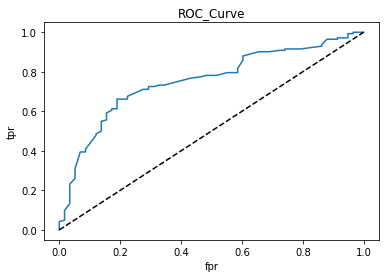

In [152]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred_proba_good)
plt.plot(fpr,tpr)
plt.plot(fpr,fpr,linestyle = "--",color = "k")
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC_Curve")


In [153]:
AUROC = roc_auc_score(y_test,y_pred_proba_good)

if AUROC;
btw 50% and 60% == BAD
btw 60% and 70% == POOR
btw 70% and 80% == FAIR
btw 80% and 90% == GOOD
btw 90% and 100% == EXCELLENT

In [154]:
AUROC

0.7532782904322487

In [155]:
#Gini

In [156]:
Gini = AUROC*2-1
Gini

0.5065565808644974

In [157]:
feature_dict = dict(zip(X_test.columns, list(reg.coef_[0])))

In [164]:
probabilities_of_good.shape

(200,)

In [163]:
probabilities_of_good = y_pred_proba[:,1]

In [165]:
Rating = []
for prob in probabilities_of_good:
    if prob >= 0.80:
        Rating.append("A")
    elif prob >= 0.60:
        Rating.append("B")
    elif prob >= 0.40:
        Rating.append("C")
    elif prob >= 0.20:
        Rating.append("D")
    else:
        Rating.append("E")

In [166]:
Rating

['D',
 'A',
 'A',
 'B',
 'A',
 'A',
 'B',
 'A',
 'A',
 'C',
 'D',
 'B',
 'A',
 'B',
 'C',
 'A',
 'B',
 'A',
 'D',
 'B',
 'C',
 'B',
 'D',
 'A',
 'A',
 'D',
 'A',
 'C',
 'A',
 'C',
 'C',
 'A',
 'A',
 'B',
 'A',
 'D',
 'B',
 'A',
 'B',
 'A',
 'C',
 'B',
 'A',
 'A',
 'A',
 'B',
 'C',
 'C',
 'C',
 'C',
 'A',
 'C',
 'D',
 'D',
 'B',
 'B',
 'E',
 'A',
 'A',
 'B',
 'D',
 'A',
 'B',
 'A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'B',
 'A',
 'A',
 'B',
 'B',
 'D',
 'A',
 'A',
 'C',
 'B',
 'A',
 'C',
 'D',
 'A',
 'A',
 'A',
 'B',
 'C',
 'D',
 'A',
 'B',
 'A',
 'C',
 'C',
 'B',
 'A',
 'B',
 'C',
 'B',
 'C',
 'C',
 'B',
 'A',
 'A',
 'A',
 'B',
 'A',
 'A',
 'C',
 'C',
 'A',
 'B',
 'C',
 'D',
 'A',
 'A',
 'A',
 'D',
 'A',
 'A',
 'C',
 'B',
 'A',
 'B',
 'B',
 'B',
 'A',
 'A',
 'A',
 'A',
 'A',
 'B',
 'B',
 'D',
 'C',
 'A',
 'C',
 'A',
 'A',
 'C',
 'D',
 'C',
 'D',
 'B',
 'B',
 'A',
 'A',
 'A',
 'D',
 'C',
 'B',
 'A',
 'B',
 'A',
 'B',
 'A',
 'A',
 'C',
 'A',
 'A',
 'A',
 'B',
 'B',
 'A',
 'A',
 'D',
 'E',
 'B'

In [168]:
len(Rating)

200

In [169]:
Rating.count("A")

86

In [177]:
RatingScore = ["A","B","C","D","E"]
RatingName = []
Density = []
for i in RatingScore:
    RatingName.append(i)
    Density.append(((Rating.count(i)/len(Rating))**2))
    
Rating_Density = pd.DataFrame({"RatingScore":RatingName,"Density":Density})


In [179]:
Rating_Density

RatingScore   Density
0           A  0.184900
1           B  0.070225
2           C  0.034225
3           D  0.011025
4           E  0.000225

In [181]:
HHI = sum(Density)

In [182]:
HHI

0.3006

In [183]:
y_pred

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1])

In [188]:
y_pred_proba[:,0]

array([0.70017358, 0.11131993, 0.07729617, 0.38757215, 0.1111287 ,
       0.1111287 , 0.22106539, 0.07776952, 0.12047787, 0.59351795,
       0.63292683, 0.32339508, 0.19527338, 0.32339508, 0.40583243,
       0.07930064, 0.20213698, 0.06214983, 0.62518061, 0.37304663,
       0.49649557, 0.37304663, 0.615355  , 0.13978116, 0.14735871,
       0.69899197, 0.13978116, 0.48620497, 0.08391939, 0.59351795,
       0.49649557, 0.10422047, 0.14735871, 0.37304663, 0.05035357,
       0.76510062, 0.37304663, 0.07729617, 0.32339508, 0.13978116,
       0.45701828, 0.32339508, 0.14735871, 0.14735871, 0.15485094,
       0.38757215, 0.51190317, 0.58491271, 0.51190317, 0.51190317,
       0.14735871, 0.59351795, 0.62518061, 0.61062894, 0.32339508,
       0.20535846, 0.8463067 , 0.04251543, 0.14735871, 0.33702657,
       0.70758392, 0.13978116, 0.32339508, 0.13978116, 0.14819222,
       0.13978116, 0.13978116, 0.32788879, 0.22385105, 0.23474236,
       0.1111287 , 0.11983943, 0.32339508, 0.20535846, 0.62518

In [189]:
PD = y_pred_proba[:,0]

In [213]:
Score_model = pd.DataFrame({"PD":PD,"Default_Flag":y_pred,"Score":Rating})

In [214]:
Score_model[:10]

PD  Default_Flag Score
0  0.700174             0     D
1  0.111320             1     A
2  0.077296             1     A
3  0.387572             1     B
4  0.111129             1     A
5  0.111129             1     A
6  0.221065             1     B
7  0.077770             1     A
8  0.120478             1     A
9  0.593518             0     C

In [220]:
Score_model[(Score_model["Default_Flag"] == 1) & (Score_model["Score"] == "A")].Score.count()

86

In [231]:
RatingScore = ["A","B","C","D","E"]
non_default = []
for score in RatingScore:
    non_default.append(Score_model[(Score_model["Default_Flag"] == 1) & (Score_model["Score"] == score)].Score.count())

In [232]:
non_default

[86, 53, 18, 0, 0]

In [233]:
RatingScore = ["A","B","C","D","E"]
default_count = []
for score in RatingScore:
    default_count.append(Score_model[(Score_model["Default_Flag"] == 0) & (Score_model["Score"] == score)].Score.count())

In [234]:
default_count

[0, 0, 19, 21, 3]

In [241]:
pd_average = []
for score in RatingScore:
    pd_average.append(Score_model[Score_model["Score"] == score].PD.mean())

In [242]:
pd_average

[0.11686491403941855,
 0.2997505926440388,
 0.5007130783713325,
 0.6691298488511812,
 0.8630960875480516]

In [256]:
Score_model[Score_model["Score"] == "E"]

PD  Default_Flag Score
56   0.846307             0     E
165  0.885238             0     E
191  0.857744             0     E

In [260]:
Score_model.loc[Score_model["Score"] == "E","PD"] = 1

In [261]:
Score_model.loc[Score_model["Score"] == "E","PD"]

56     1.0
165    1.0
191    1.0
Name: PD, dtype: float64